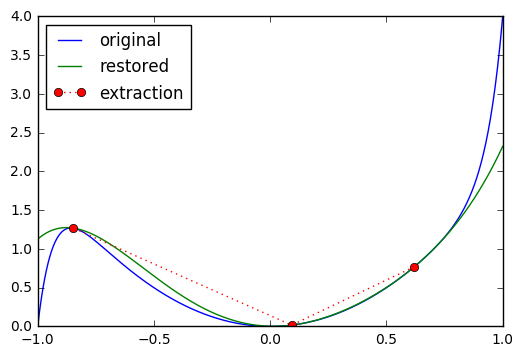

In [78]:
import numpy as np
import random
from numpy.polynomial import Chebyshev as T
from numpy import polynomial as P
import matplotlib.pyplot as plt
%matplotlib inline
# init
# number of grid points
n = 801
ToRandom = True

# Chebyshev polynomial power
m = 6

# main domain
x = np.linspace(-1, 1, n)
y = np.zeros(n, dtype=float)
dy = np.zeros(n, dtype=float)
y_restored = np.zeros(n, dtype=float)

# extraction domains
x_t = np.zeros(m/2, dtype=float)
y_t = np.zeros(m/2, dtype=float)
dy_t = np.zeros(m/2, dtype=float)

# Cheb polynomials and Cheb derivative matrices. They have (m/2) number of rows cause they are going to be connected afterwards
T_t = np.zeros((m/2, m) ,dtype=float)
T_t_der = np.zeros((m/2, m) ,dtype=float)



# function 
y = 2*(x ** 15) + 2*(x ** 2)

# analytical derivative
dy = 30*(x ** 14) + (4 * x)   

# uniform extraction
# forming extraction domains and Cheb matrices
for i in xrange(m/2):
#i = 0
#while i < (m/2):
    if ToRandom:
        point = np.random.randint(0, n)
    else:
        point = i*((2*n)//m)
    x_t[i] = x[point]
    y_t[i] = y[point]
    dy_t[i] = dy[point]
    #j = 0
    #while j < m:
    for j in xrange(m):
        T_t[i][j] = T.basis(j)(x_t[i])
        T_t_der[i][j] = T.basis(j).deriv(1)(x_t[i])
        #j = j + 1
    #i = i + 1

# coupling extraction domains and Cheb matrices into solid blocks, such that values of y_t and dy_t fit to corresponding rows of T_t and T_t_der respectively
Tgen = np.concatenate((T_t, T_t_der), axis=0)  
Y = np.concatenate((y_t, dy_t), axis=0)
C = np.linalg.solve(Tgen, Y)

if False:
    # restoring function on whole domain
    #i = 0
    #while i < n:
    for i in xrange(n):
        #j = 0
        summ = 0.0
        for j in xrange(m):
        #while j < m:
            summ += C[j]*T.basis(j)(x[i])
            #j = j + 1
        y_restored[i] = summ
        #i = i + 1
        
# The whole block above we can change (and speed up) by
if True:
    y_restored[:] = 0.0
    for j in xrange(m):
        y_restored += C[j]*T.basis(j)(x)
    
plt.plot(x, y)    
plt.plot(x, y_restored)
plt.plot(x_t, y_t, linestyle = ':', marker = 'o')
plt.legend(['original', 'restored', 'extraction'], loc='upper left')

In [75]:
np.random.randint(0,1)

0